# Analisis de sentimientos

Configuración lista de stopwords 

In [51]:
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')
palabras = [
    'alo', 'fulanito', 'fulanita', 'hola', 'si', 'no', 'pues','entonces', 'buenos', 'dias', 'buen',
    'dia', 'poder', 'narrar', 'ir', 'vehiculo', 'servicio', 'usted', 'tarde', 'momento', 'señor', 'hacer', 'correo', 
    'favor', 'mensaje', 'cliente','buena', 'senor', 'decir'
]

spanish_stopwords = spanish_stopwords + palabras

Funciones para limpieza y preparación de datos

In [52]:
import pandas as pd
import re
from unicodedata import normalize

# Función de limpieza de texto
def limpieza(texto):
  texto = str(texto) #Garantizar que todas las celdas contengan strings
  texto = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD",texto), 0, re.I) #Eliminar diacríticos
  texto = re.sub('(f|ht)tp(s?)://(.*)[.][a-z]+[/][a-z]+',' ',texto) #Borrar urls
  texto= re.sub('[a-zA-Z0-9.?{}]+@\w+\.\w+.\w*','',texto) #Eliminar correos electrónicos
  texto= re.sub('[^a-zA-Z_á\éíóúà\èìòùäëïöü\s]','',texto) #Eliminar letras de alfabetos extraños
  return texto.lower() #Convertir a minuscula y retornar todo el proceso

#Eliminar stopwords
def stopWordsBorrar(texto):
    lista = list()
    for word in texto.split():
      if word not in spanish_stopwords:
        lista.append(word)
    return ' '.join(lista)

#Función Lematizar
import spacy
nlp = spacy.load("es_core_news_sm")

def lemmatizar(texto):
  document = nlp(texto)
  lema = [token.lemma_ for token in document]
  return ' '.join(lema)

# Función Stemmizar
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='spanish')
def Stemmer(texto):
  texto_stem = [stemmer.stem(token.text) for token in texto]
  return ' '.join(texto_stem)

Aplicación de las funciones 

In [53]:
import pandas as pd

tabla = pd.read_csv("transcripciones.csv")
tabla["Limpios"] = tabla["texto_llamada_modificado"].apply(limpieza)
tabla['stopwords']  = tabla['Limpios'].apply(stopWordsBorrar)
tabla["lematizados"] = tabla["stopwords"].apply(lemmatizar)

tabla.sample(10)

,nombre_archivo,texto_llamada_modificado,Limpios,stopwords,lematizados
18,Agente1.date.2024-08-08.id.12739_9.wav,sistema correo de voz tendra costo a partir de...,sistema correo de voz tendra costo a partir de...,sistema voz tendra costo partir contestador de...,sistema voz tendra costo partir contestador de...
1455,Agente14.date.2024-08-08.id.12985_8.wav,sistema correo de voz tendra costo a partir de...,sistema correo de voz tendra costo a partir de...,sistema voz tendra costo partir contestador de...,sistema voz tendra costo partir contestador de...
180,Agente1.date.2024-08-13.id.9607_1.wav,NaN,nan,nan,nar
885,Agente8.date.2024-08-13.id.8496.wav,doy la fulanita a la linea de atencion al clie...,doy la fulanita a la linea de atencion al clie...,doy linea atencion renault habla porras gusto ...,dar linea atencion renault hablar porra gusto ...
1223,Agente10.date.2024-08-14.id.3944.wav,alo alo alo alo alo alo alo alo,alo alo alo alo alo alo alo alo,,
254,Agente2.date.2024-08-09.id.1998.wav,muy buenos dias me habla fulanita montoya ases...,muy buenos dias me habla fulanita montoya ases...,habla montoya asesora bancoestado escribio man...,hablar montoya asesora bancoestado escribio ma...
98,Agente1.date.2024-08-12.id.12739_14.wav,sistema correo de voz tendra costo a partir de...,sistema correo de voz tendra costo a partir de...,sistema voz tendra costo partir,sistema voz tendra costo partir
1175,Agente10.date.2024-08-08.id.9857.wav,muy buenos dias fulanita a la linea de servici...,muy buenos dias fulanita a la linea de servici...,linea renovable yanguas gusto hablar hoy ferna...,line renovable yangua gusto hablar hoy fernand...
22,Agente1.date.2024-08-08.id.1723145320.wav,alo muy buenas tardes mi nombre es fulanito ve...,alo muy buenas tardes mi nombre es fulanito ve...,buenas tardes nombre vergara asesor linea rena...,buena tarde nombre vergara asesor line renault...
1496,Agente14.date.2024-08-13.id.12985.wav,sistema correo de voz tendra costo a partir de...,sistema correo de voz tendra costo a partir de...,sistema voz tendra costo partir contestador tr...,sistema voz tendra costo partir contestador tr...


Analisis de palabras mas frecuentes (no dan valor) para añadir en las stopwords iniciales 

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
lematizados = vectorizer.fit_transform(tabla["lematizados"])'''

In [ ]:
'''result = pd.DataFrame(data = lematizados.sum(axis=0).T, index = vectorizer.get_feature_names_out(), columns=["freq"])
orderedResult = result.sort_values(by="freq",ascending=False)

list(orderedResult[:15].index)'''

['poder',
 'nar',
 'ir',
 'vehiculo',
 'servicio',
 'usted',
 'tarde',
 'momento',
 'senor',
 'hacer',
 'correo',
 'favor',
 'mensaje',
 'cliente',
 'buena']

Uso de modelos entrenados para la predicción de sentimientos con los datos lematizados.

In [4]:
import joblib

In [54]:
#Cargamos clasificador
clasificador_logistic = joblib.load('LogisticRegression_Model.pkl')
clasificador_SVM = joblib.load('SVM_Model.pkl')

vectorizer = joblib.load('vectorizado_datos_stop_lematizados.pkl')
test_info = vectorizer.transform(tabla['lematizados'])

tabla["logistic"] = clasificador_logistic.predict(test_info)
tabla['svm'] = clasificador_SVM.predict(test_info)

tabla.head()

/home/mateo/estructuraDatos/Proyecto final/env_final/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mateo/estructuraDatos/Proyecto final/env_final/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mateo/estructuraDatos/Proyecto final/env_final/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying

,nombre_archivo,texto_llamada_modificado,Limpios,stopwords,lematizados,logistic,svm
0,Agente1.date.2024-08-08.id.0262.wav,buenas tardes bienvenido a la linea de servici...,buenas tardes bienvenido a la linea de servici...,buenas tardes bienvenido linea renault nombre ...,buena tarde bienvenido line renault nombre ver...,1,1
1,Agente1.date.2024-08-08.id.0575.wav,muy buenas tardes bienvenido a la linea de ser...,muy buenas tardes bienvenido a la linea de ser...,buenas tardes bienvenido linea renault nombre ...,buena tarde bienvenido line renault nombre ver...,1,1
2,Agente1.date.2024-08-08.id.12739.wav,te damos la fulanita a casa todos y celebramos...,te damos la fulanita a casa todos y celebramos...,damos casa celebramos parte anos trayectoria e...,dar casa celebrir parte ano trayectoria evoluc...,0,0
3,Agente1.date.2024-08-08.id.12739_1.wav,buenas tardes muy buenas tardes mi nombre es f...,buenas tardes muy buenas tardes mi nombre es f...,buenas tardes buenas tardes nombre vergara ase...,buena tarde buena tarde nombre vergara asesor ...,1,0
4,Agente1.date.2024-08-08.id.12739_10.wav,sistema correo de voz tendra costo a partir de...,sistema correo de voz tendra costo a partir de...,sistema voz tendra costo partir,sistema voz tendra costo partir,0,0


In [55]:
tabla["Clasificación final"] = ""

for i in range(len(tabla['logistic'])):
    if tabla.loc[i, 'logistic'] == tabla.loc[i, 'svm']:
        tabla.loc[i, 'Clasificación final'] = tabla.loc[i, 'logistic']
    else:
        tabla.loc[i, 'Clasificación final'] = tabla.loc[i, 'svm']

tabla.head()

,nombre_archivo,texto_llamada_modificado,Limpios,stopwords,lematizados,logistic,svm,Clasificación final
0,Agente1.date.2024-08-08.id.0262.wav,buenas tardes bienvenido a la linea de servici...,buenas tardes bienvenido a la linea de servici...,buenas tardes bienvenido linea renault nombre ...,buena tarde bienvenido line renault nombre ver...,1,1,1
1,Agente1.date.2024-08-08.id.0575.wav,muy buenas tardes bienvenido a la linea de ser...,muy buenas tardes bienvenido a la linea de ser...,buenas tardes bienvenido linea renault nombre ...,buena tarde bienvenido line renault nombre ver...,1,1,1
2,Agente1.date.2024-08-08.id.12739.wav,te damos la fulanita a casa todos y celebramos...,te damos la fulanita a casa todos y celebramos...,damos casa celebramos parte anos trayectoria e...,dar casa celebrir parte ano trayectoria evoluc...,0,0,0
3,Agente1.date.2024-08-08.id.12739_1.wav,buenas tardes muy buenas tardes mi nombre es f...,buenas tardes muy buenas tardes mi nombre es f...,buenas tardes buenas tardes nombre vergara ase...,buena tarde buena tarde nombre vergara asesor ...,1,0,0
4,Agente1.date.2024-08-08.id.12739_10.wav,sistema correo de voz tendra costo a partir de...,sistema correo de voz tendra costo a partir de...,sistema voz tendra costo partir,sistema voz tendra costo partir,0,0,0


Nubes de palabras para cada categoría 

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

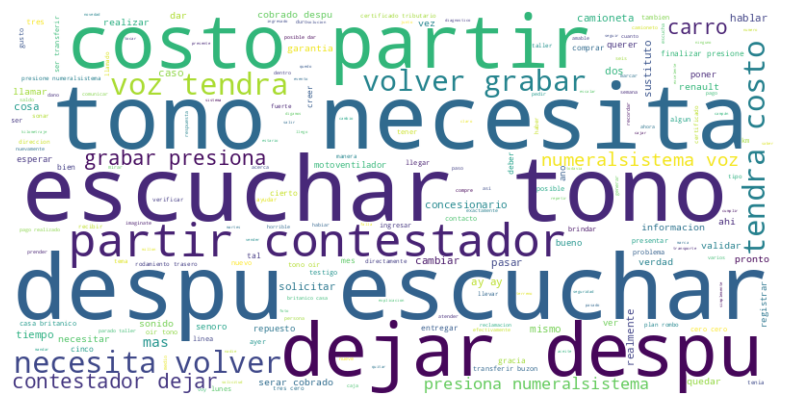

In [60]:
negativos = ''.join(tabla.query('`Clasificación final` == -1')['lematizados'])

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=spanish_stopwords,
                      background_color='white',
                      width=800,
                      height=400).generate(negativos)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

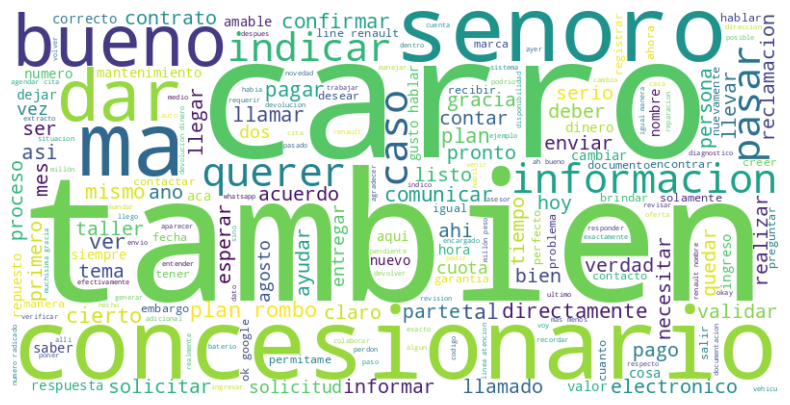

In [61]:
neutros = ''.join(tabla.query('`Clasificación final` == 0')['lematizados'])

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=spanish_stopwords,
                     background_color='white',
                      width=800,
                      height=400).generate(neutros)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

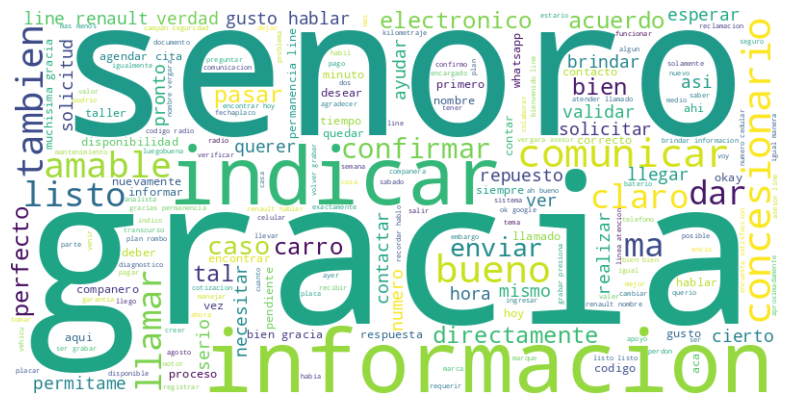

In [62]:
positivos = ''.join(tabla.query('`Clasificación final` == 1')['lematizados'])

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=spanish_stopwords,
                     background_color='white',
                      width=800,
                      height=400).generate(positivos)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

In [ ]:
tabla.to_csv('analisisFinal.csv', index=False)  